### Implementación de regresión lineal en Pytorch, Regresión logística, Implementación de regresión logística en Pytorch.


In [0]:
import torch
import numpy as np # Necesario para trabajar con arreglos
import torch.nn as nn # Modulos de pytorch (redes neuronales) / relacion lineal
import torch.optim as optim # Modulo de optimizacion, necesario para calcular gradientes y hacer backpropagation

import matplotlib.pyplot as plt



### Regresion Lineal

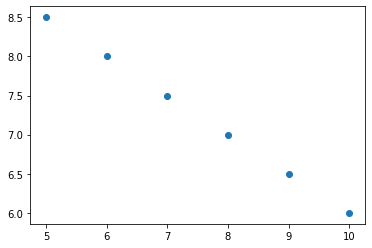

In [25]:
car_prices = [5, 6, 7, 8, 9, 10]
units_sold = [8.5, 8, 7.5, 7.0, 6.5, 6.0]

plt.scatter(car_prices, units_sold) # Visualizacion de los datos

In [0]:
prices_array = np.array(car_prices).reshape(-1, 1) # Convertimos a arreglo de numpy y le damos un formato diferente.
units_array = np.array(units_sold).reshape(-1, 1) # Convertimos a arreglo de numpy y le damos un formato diferente.

In [27]:
prices_array
units_array

array([[8.5],
       [8. ],
       [7.5],
       [7. ],
       [6.5],
       [6. ]])

In [0]:
prices = torch.from_numpy(prices_array).float().requires_grad_(True) # Lo convertimos en Tensor. Lo forzamos a que sea float y activamos gradientes.

In [0]:
units = torch.from_numpy(units_array).float().requires_grad_(True) # Lo convertimos en Tensor. Lo forzamos a que sea float y activamos gradientes.

In [30]:
prices, prices.shape

(tensor([[ 5.],
         [ 6.],
         [ 7.],
         [ 8.],
         [ 9.],
         [10.]], requires_grad=True), torch.Size([6, 1]))

### Creacion del modelo

0.019882366061210632


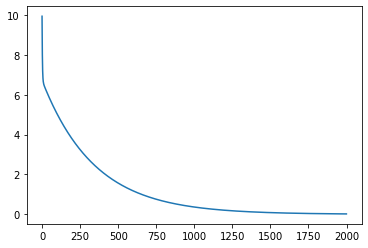

In [37]:
model = nn.Linear(1, 1) # Metodo Linear recibe el tamaño de entrada de la dimensión

loss_function = nn.MSELoss() # Media del cuadrado de los errores.

optimizer = optim.SGD(model.parameters(), lr = 0.015) #Stocastic Gradient Descent

losses = []
iterations = 2000 # Iteraciones del entrenamiento

for i in range(iterations): # Tranning loop de las iteraciones
  pred = model(prices)
  loss = loss_function(pred, units)
  losses.append(loss.data)
  
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

print(float(loss))
plt.plot(range(iterations), losses)



### Prediccion

In [38]:
x = torch.Tensor([[4.0]])
p = model(x)
p

tensor([[8.6877]], grad_fn=<AddmmBackward>)